# Loan Application Status Prediction

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#importing data
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/refs/heads/master/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
#checking for columns
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
#checking for shape
print('Number of rows :',df.shape[0])
print('Number of columns :',df.shape[1])

Number of rows : 614
Number of columns : 13


In [8]:
#checking for datatypes
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Dataset contains 4 columns of float type,1 column of int type and 8 columns of object datatype.
Null values may present.

In [10]:
#checking for duplicated values
df.duplicated().sum()

0

In [11]:
#checking for unique values
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [12]:
for i in df.columns:
    print(df[i].value_counts())
    print('='*100)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: L

In [16]:
#droping irrelevent coloumn
df.drop(columns='Loan_ID',inplace=True)

In [17]:
#checking for null values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

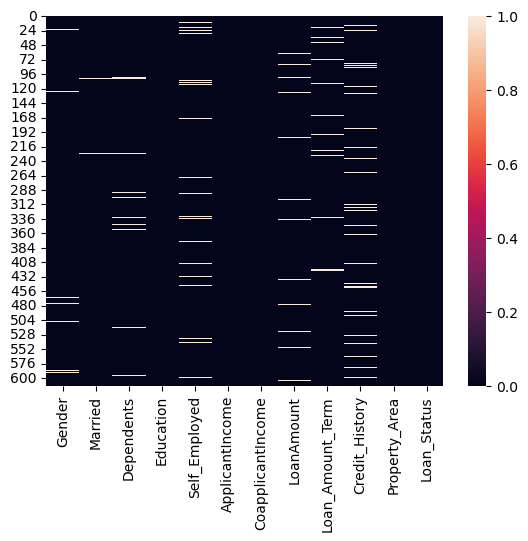

In [18]:
sns.heatmap(df.isnull())

Dataset contains null values.

# Removing null values

In [19]:
#removing null values from categorical data
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)


In [87]:
df['Dependents']=df['Dependents'].fillna(0)
df['Credit_History']=df['Credit_History'].fillna(0)

In [21]:
df['LoanAmount'].fillna(np.mean(df['LoanAmount']),inplace=True)
df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']),inplace=True)

In [22]:
#rechecking for null values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

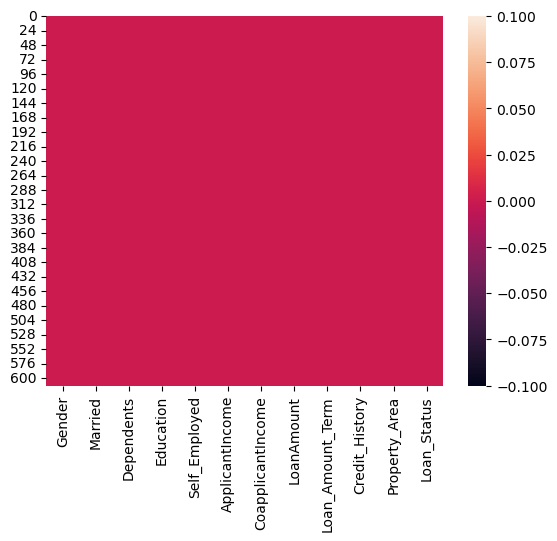

In [23]:
sns.heatmap(df.isnull())

All null values are removed.

#                                 Exploratory Data Analysis(EDA) and Visualization

In [24]:
#seperating categorical and numerical data
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print('Categorical columns :',cat_col)
print('\n')

num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print('Numerical Column :',num_col)

Categorical columns : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical Column : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


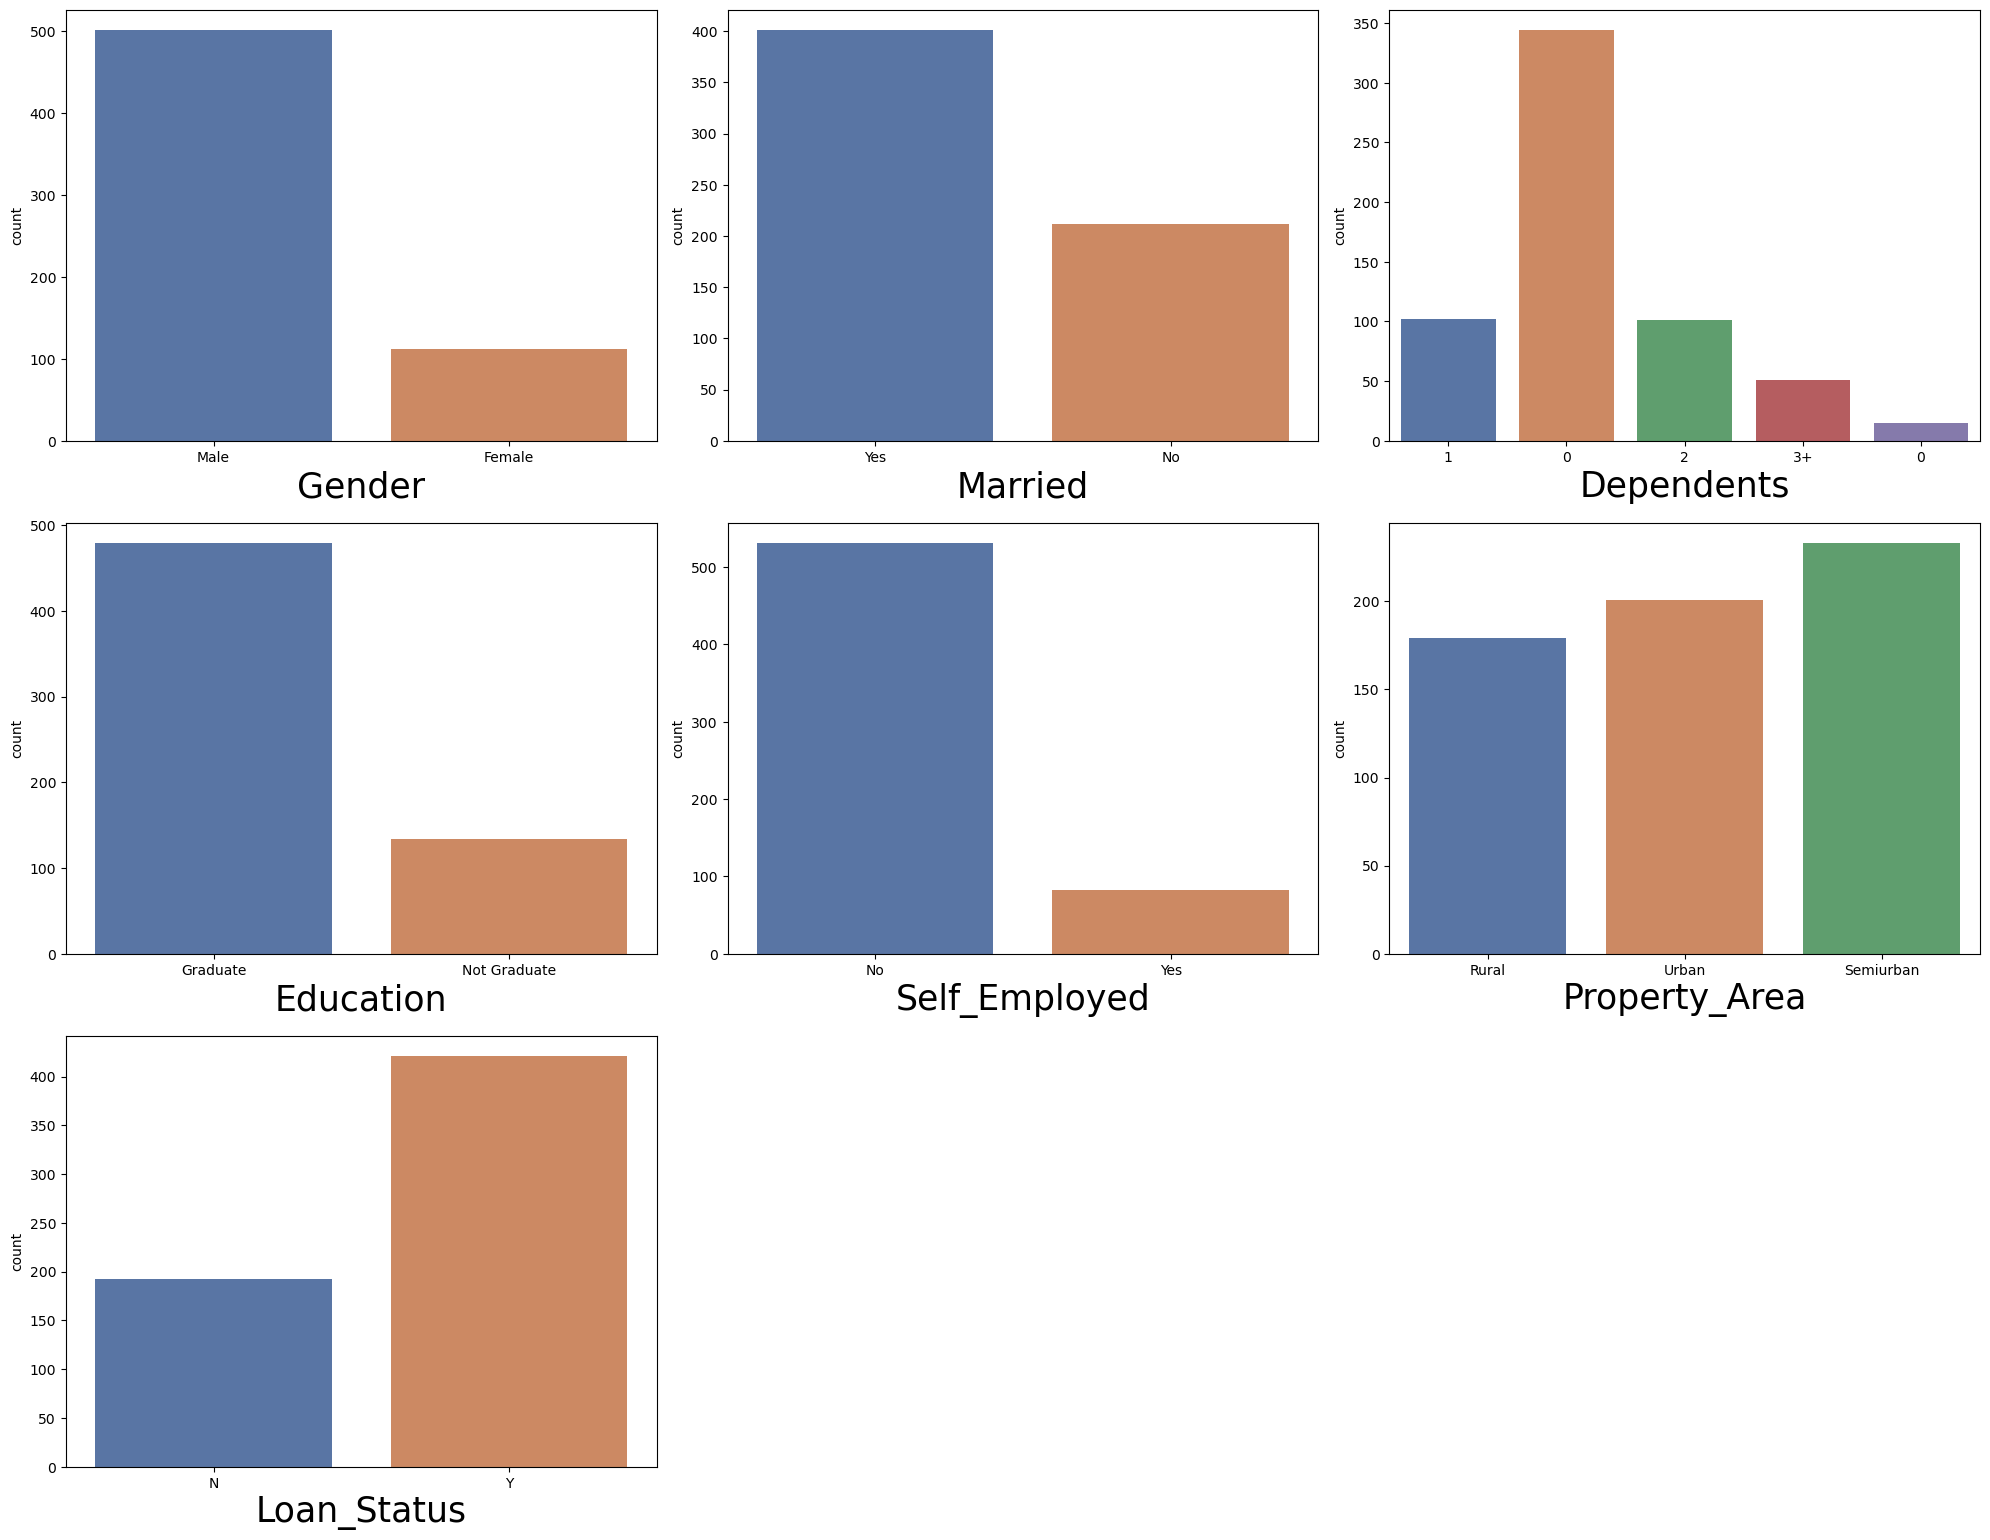

In [52]:
sns.set_palette('deep')
plt.figure(figsize=(20,20), facecolor='white')

for i, col in enumerate(cat_col, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=col)
    plt.xlabel(col, fontsize=25)

plt.tight_layout()
plt.show()
    

* There are more males than females.
* There are more married individuals than unmarried ones.
* There are more graduates than non-graduates.
* There are more people who are not self-employed than those who are.
* More people are from semi-urban areas compared to urban and rural areas.


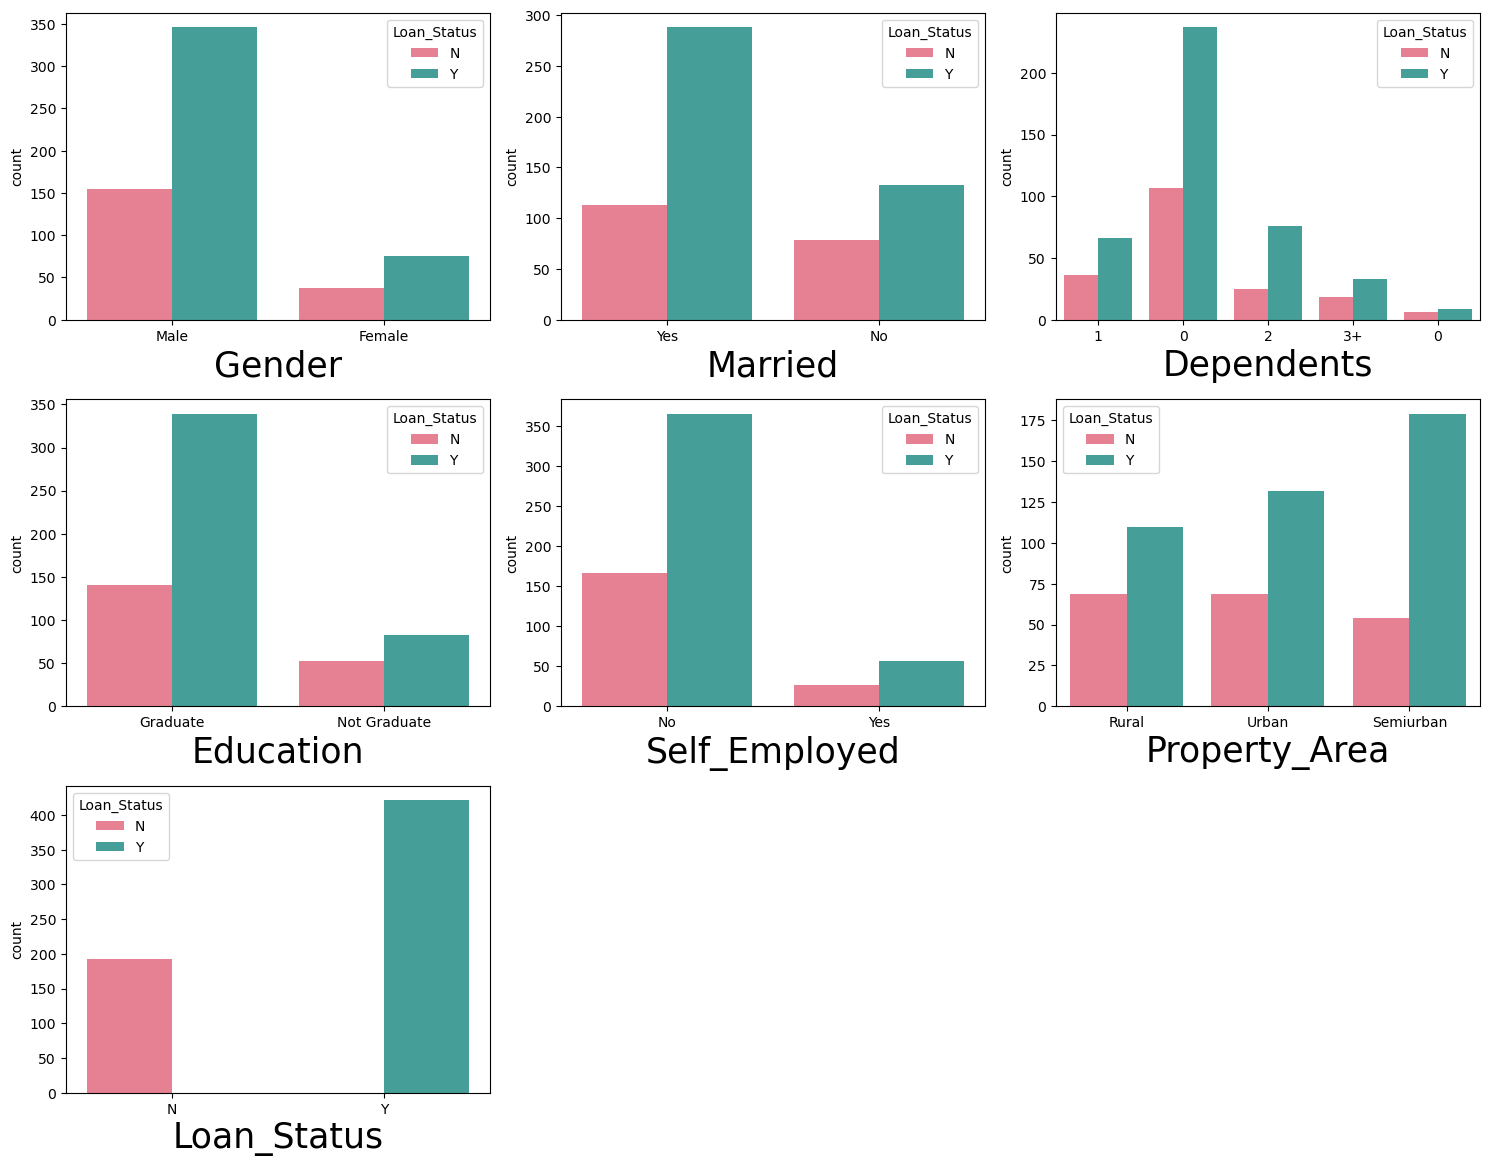

In [51]:
plt.figure(figsize=(15,15))

for i, col in enumerate(cat_col, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=col,hue='Loan_Status',palette='husl')
    plt.xlabel(col, fontsize=25)

plt.tight_layout()
plt.show()
    

The likelihood of loan approval is higher for males, married individuals, those with no dependents, graduates, self-employed individuals, and those from semi-urban areas.

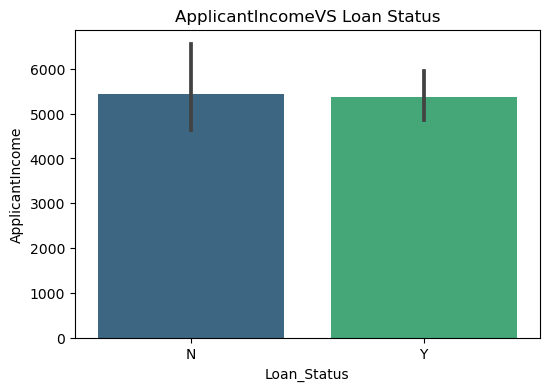

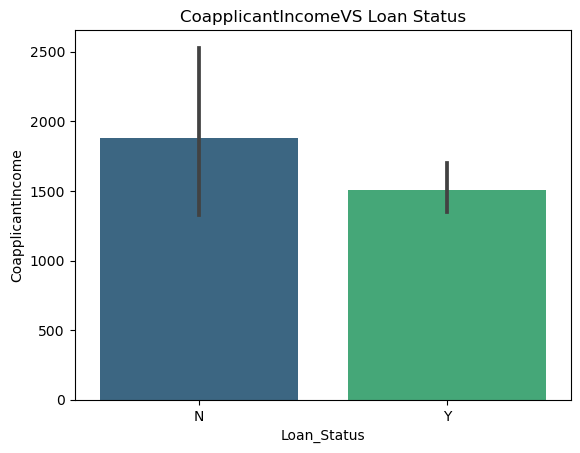

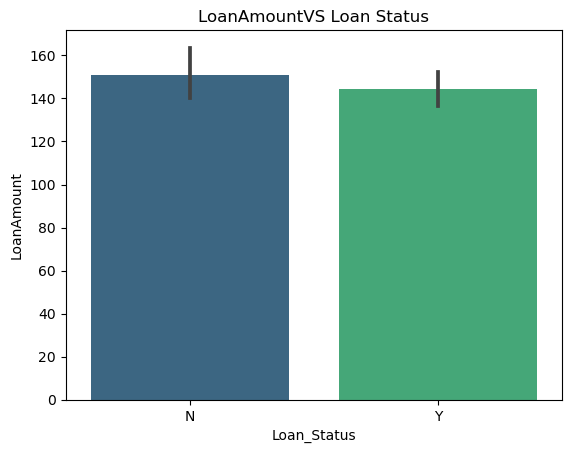

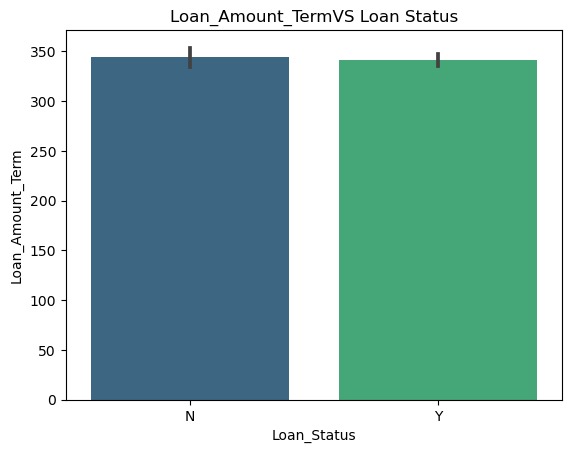

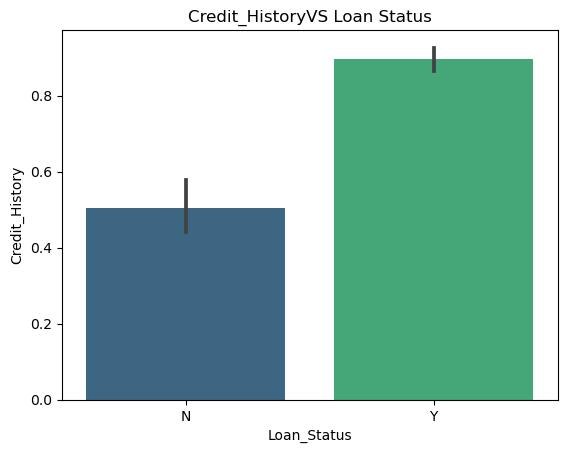

In [28]:
plt.figure(figsize=(6,4))
for col in num_col:
    plt.title(col+'VS Loan Status')
    sns.barplot(y=col,x='Loan_Status',data=df,palette='viridis')
    plt.show()
    

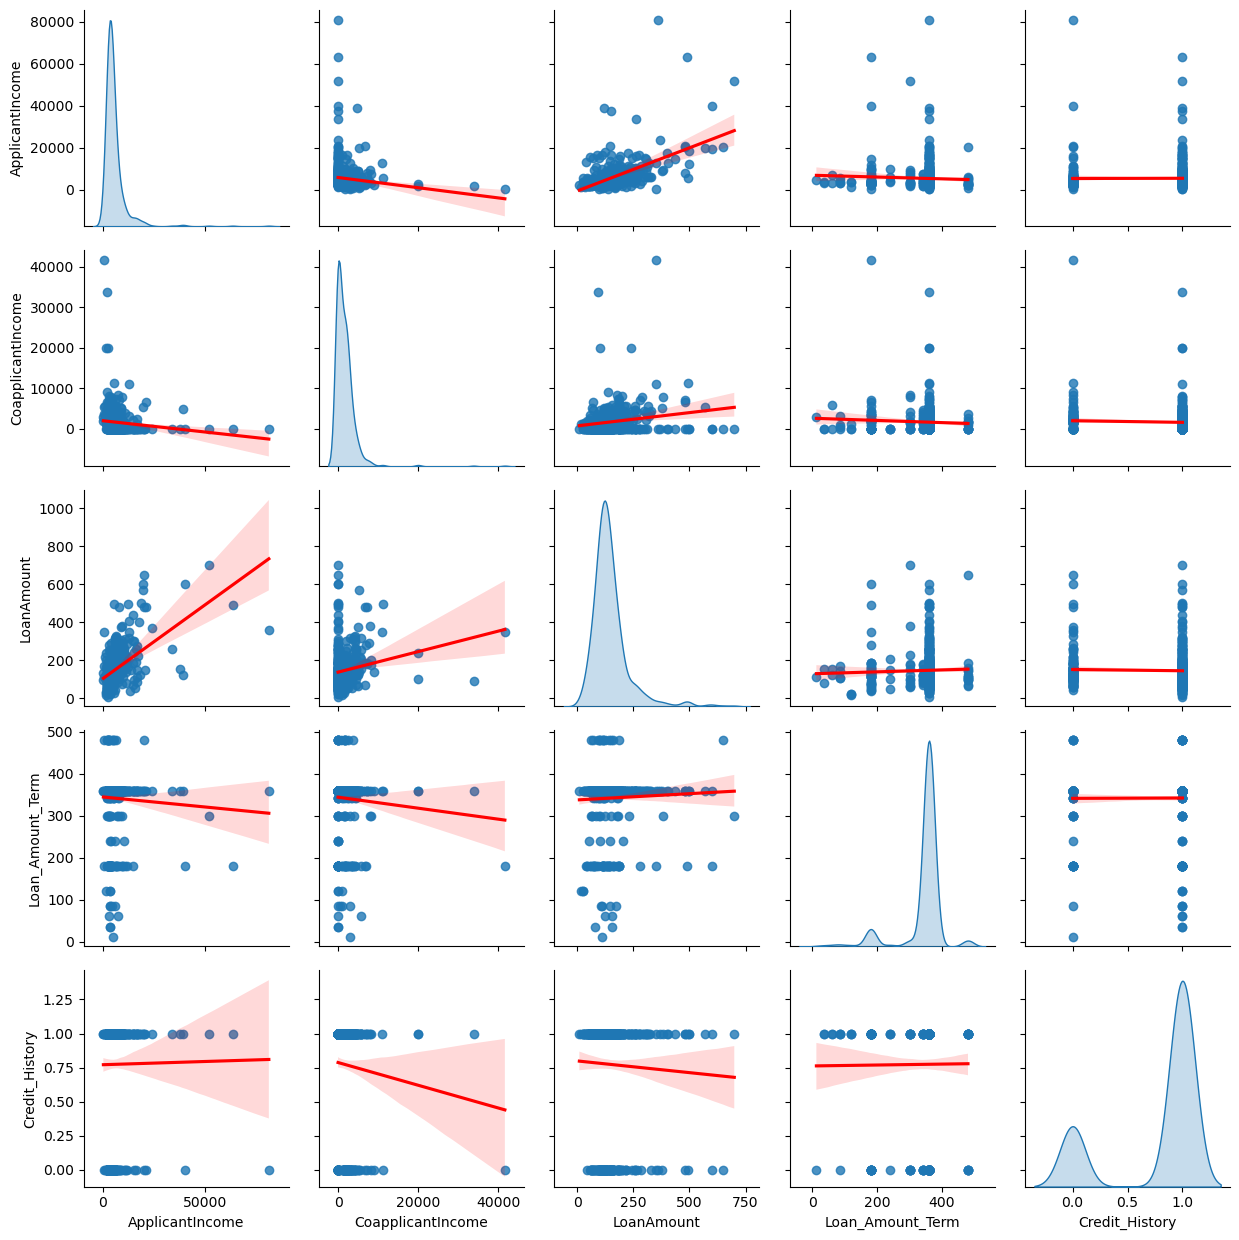

In [31]:
sns.pairplot(df,kind='reg',diag_kind='kde',plot_kws={'line_kws':{'color':'red'}})
plt.tight_layout()
plt.show()

# Encoding

We encode the categorical data for further analysis

In [34]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le=LabelEncoder()
encode_col=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']
for i in encode_col:
    df[i]=le.fit_transform(df[i])

In [41]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [45]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

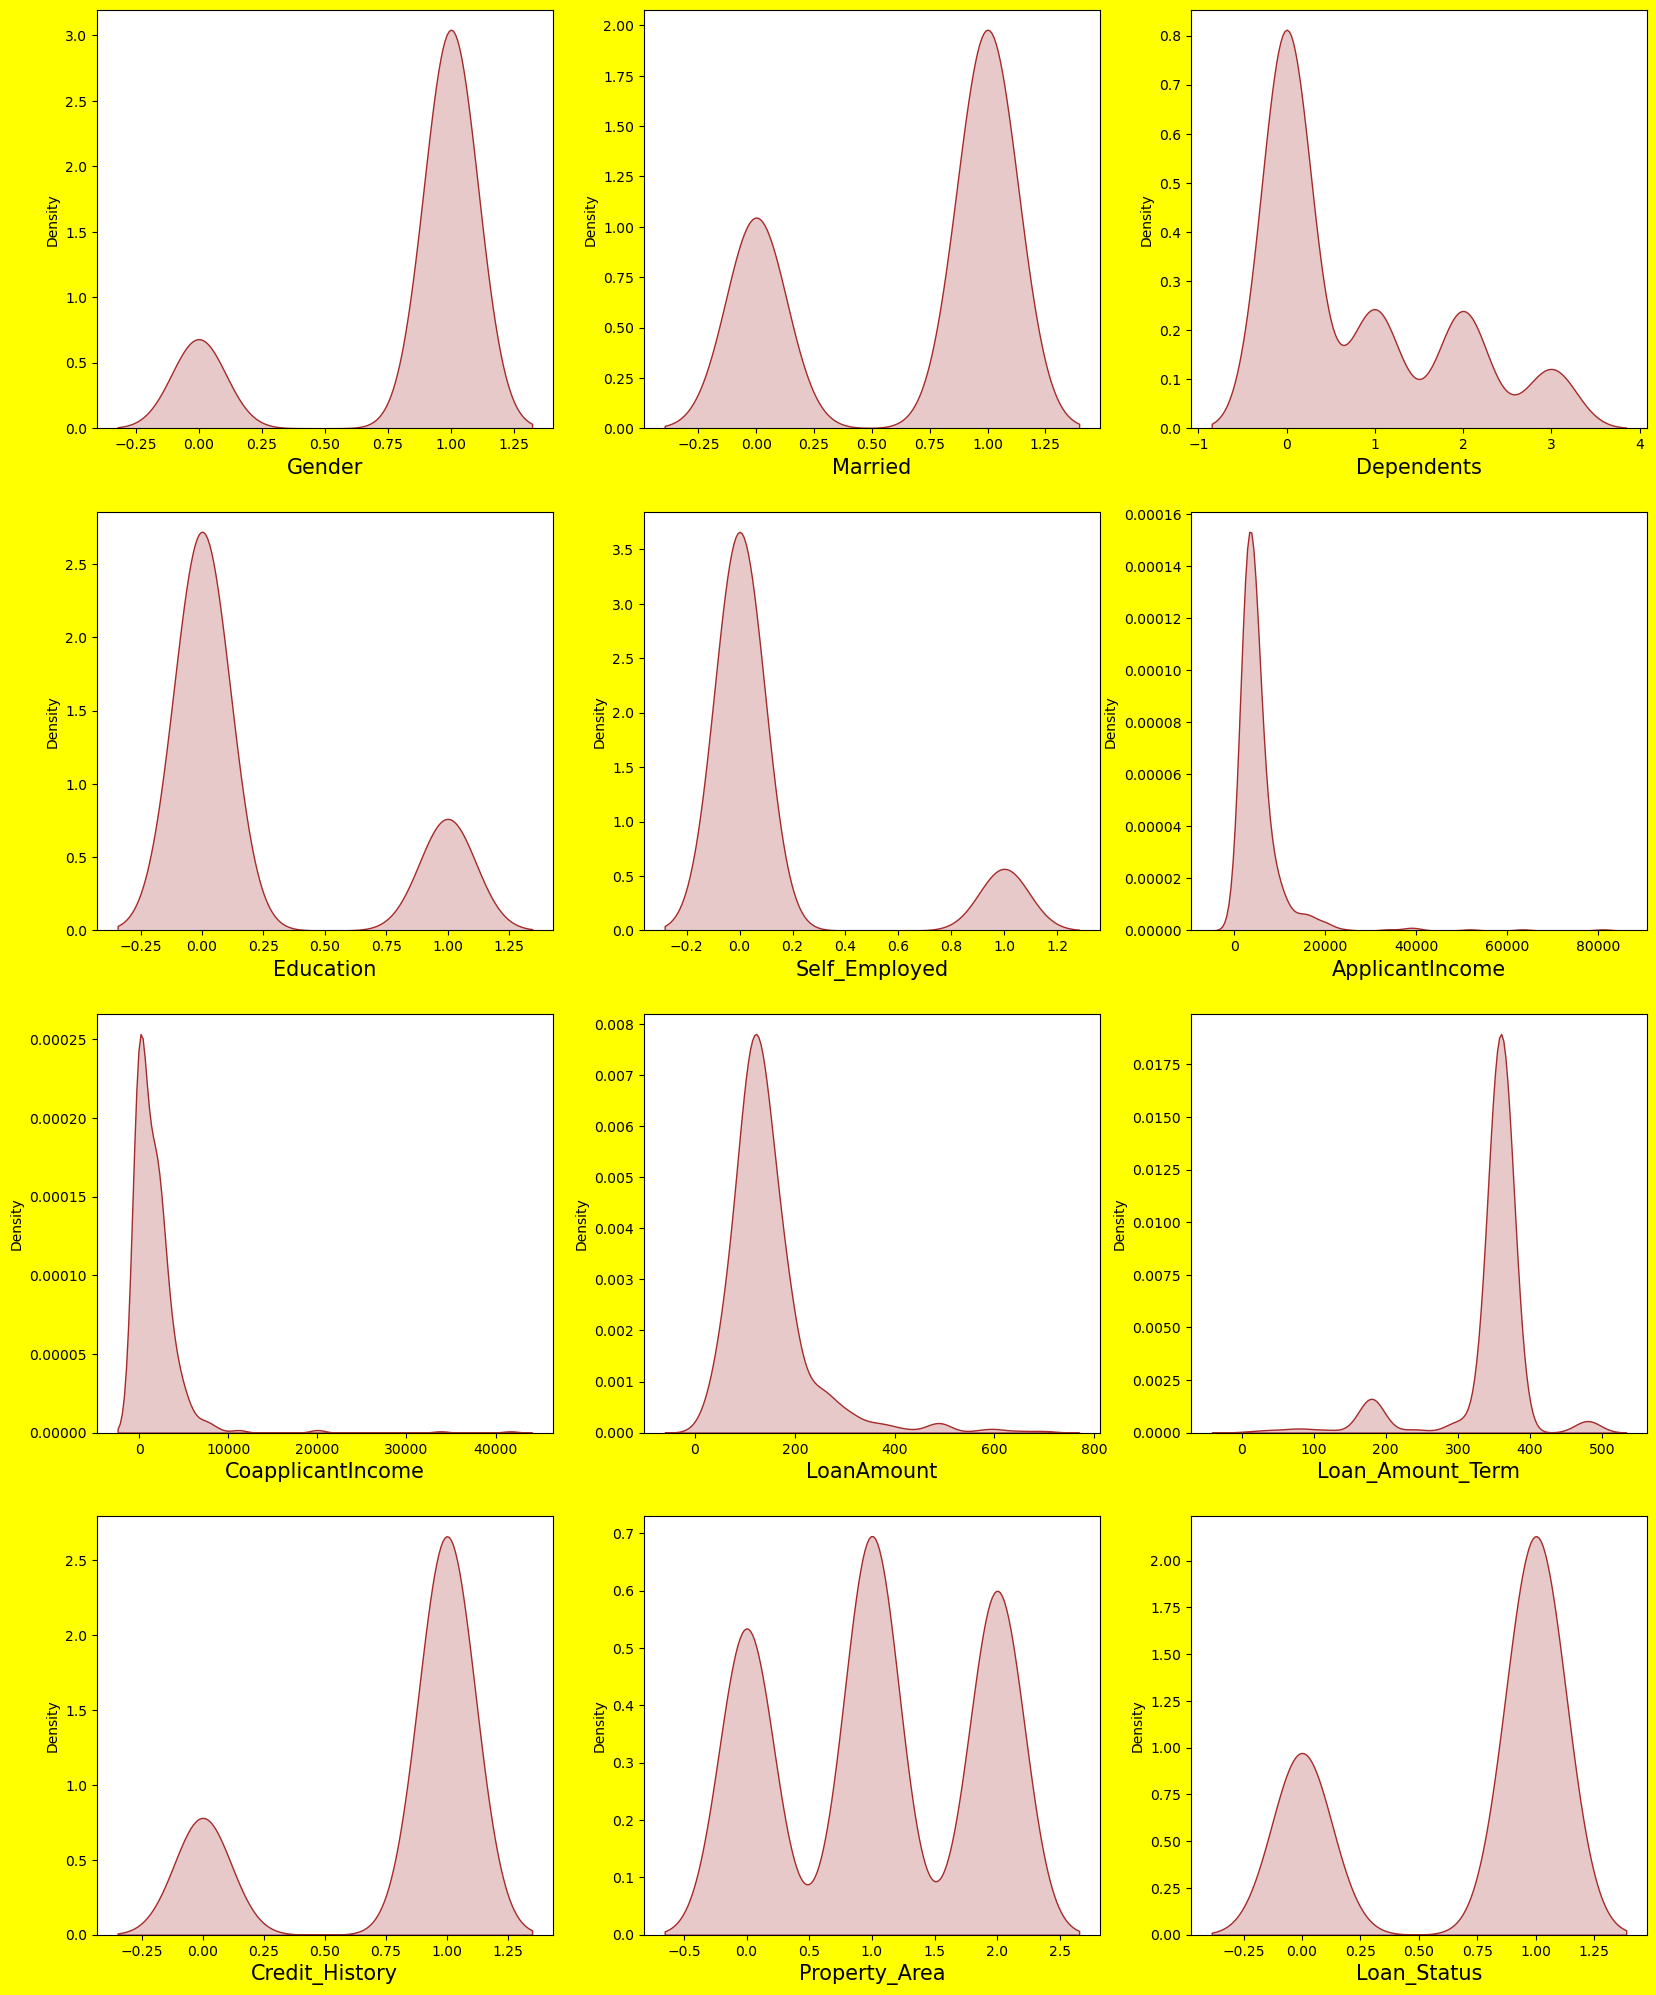

Gender              -1.646215
Married             -0.649810
Dependents           0.976154
Education            1.365098
Self_Employed        2.157034
ApplicantIncome      6.534654
CoapplicantIncome    7.488653
LoanAmount           2.724391
Loan_Amount_Term    -2.386832
Credit_History      -1.308317
Property_Area       -0.063379
Loan_Status         -0.807437
dtype: float64


In [47]:
#checking for skewness
plt.figure(figsize=(20,25),facecolor='yellow')
pltnum=1
for col in df:
    if pltnum<=12:
        ax=plt.subplot(4,3,pltnum)
        sns.distplot(df[col],color='brown',hist=False,kde_kws={'shade':True})
        plt.xlabel(col,fontsize=15)
    pltnum+=1
plt.show()
print(df.skew())

* Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount are right skewed
* Gender,Loan_Amount_Term,Credit_History are left skewed.

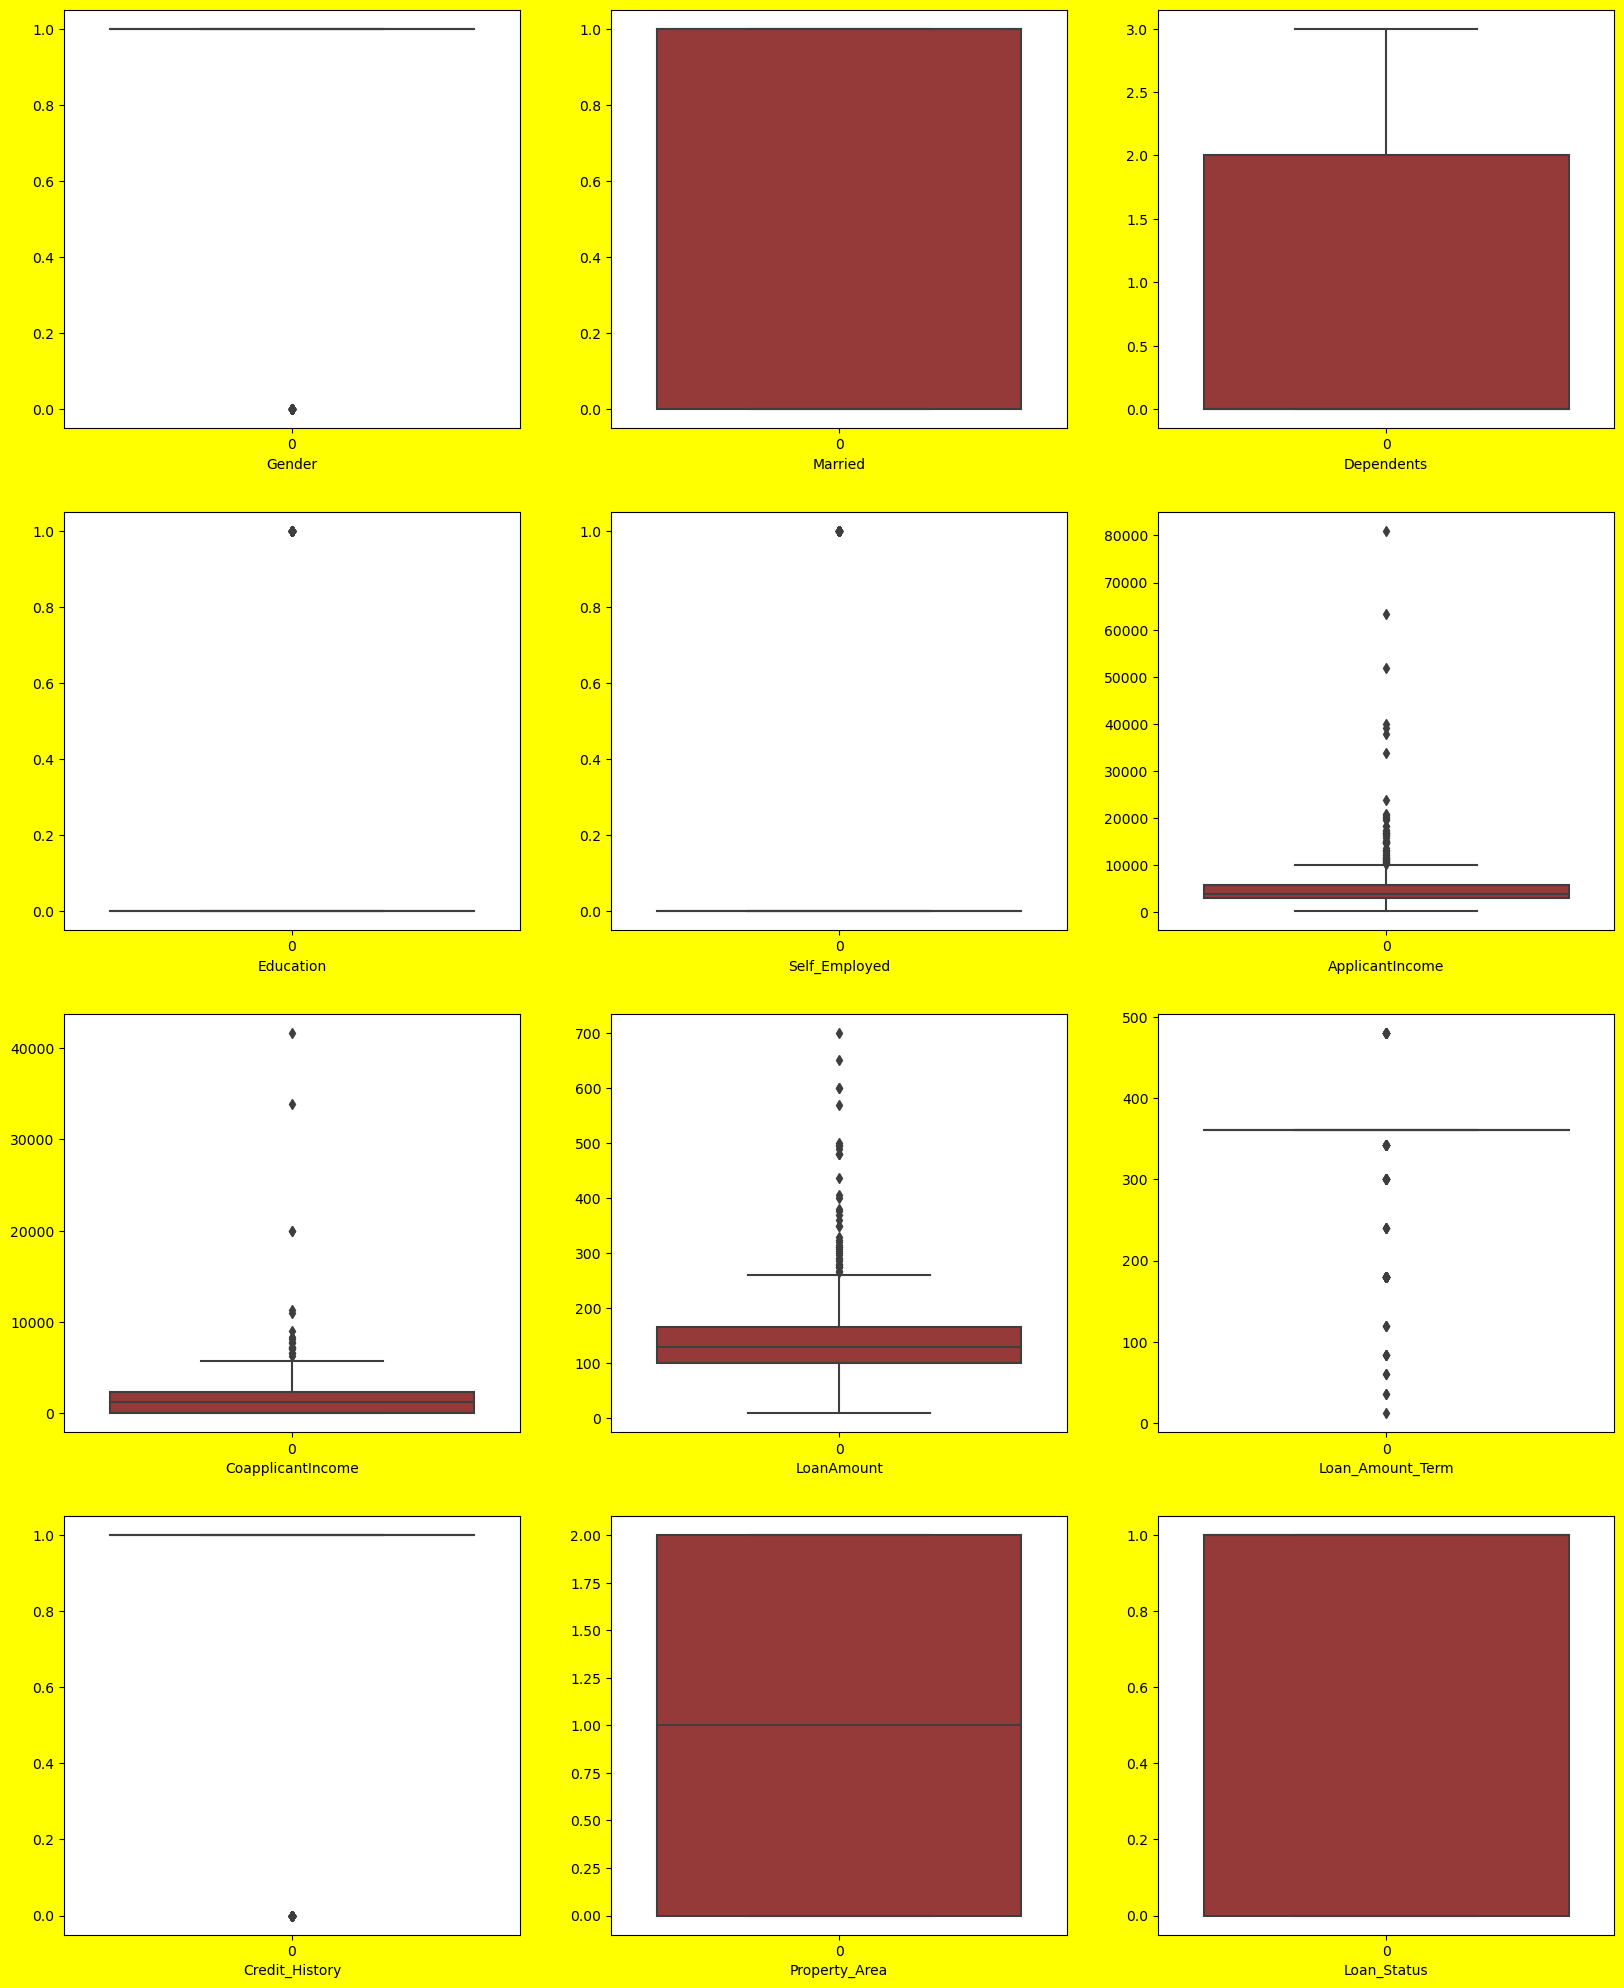

In [51]:
#checking for outliers
plt.figure(figsize=(20,25),facecolor='yellow')
pltnum=1
for col in df:
    if pltnum<=12:
        ax=plt.subplot(4,3,pltnum)
        sns.boxplot(df[col],color='brown')
        plt.xlabel(col,fontsize=10)
    pltnum+=1
plt.show()


Outliers are present.

# Removing skewness


In [56]:
from sklearn.preprocessing import power_transform
skewed = ['CoapplicantIncome','ApplicantIncome','LoanAmount','Credit_History','Loan_Amount_Term','Self_Employed','Education','Dependents','Gender']
for col in skewed:
    df[col]=power_transform((df[col].values.reshape(-1,1)))

In [57]:
df.skew()

Gender              -1.646215
Married             -0.649810
Dependents           0.406575
Education            1.365098
Self_Employed        2.157034
ApplicantIncome     -0.093424
CoapplicantIncome   -0.148503
LoanAmount           0.024165
Loan_Amount_Term     0.387958
Credit_History      -1.308317
Property_Area       -0.063379
Loan_Status         -0.807437
dtype: float64

# Removing Outliers

In [58]:
from scipy.stats import zscore

In [64]:
outlier_col=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

In [66]:
z=np.abs(zscore(df[outlier_col]))
threshold=3
df_new=df[(z<3).all(axis=1)]

In [67]:
df_new.shape

(581, 12)

In [68]:
# checking for lose of data after trating outliers
lose=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
print('percentage of data lose is :',lose)

percentage of data lose is : 5.220228384991843


# Correlation

In [69]:
df_new.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.372566,0.186898,0.042381,-0.002872,0.049596,0.247794,0.167101,-0.077438,0.027405,-0.028176,0.011081
Married,0.372566,1.000000,0.361184,0.007365,-0.006702,0.002658,0.313623,0.186475,-0.096362,-0.033581,0.022145,0.071068
Dependents,0.186898,0.361184,1.000000,0.044625,0.099239,0.133752,0.002557,0.152760,-0.108199,-0.020518,0.041744,-0.011603
Education,0.042381,0.007365,0.044625,1.000000,0.000443,-0.187711,0.025587,-0.149903,-0.107828,-0.080886,-0.072266,-0.088148
Self_Employed,-0.002872,-0.006702,0.099239,0.000443,1.000000,0.206220,-0.092913,0.110684,-0.026547,-0.007757,-0.027332,-0.026534
ApplicantIncome,0.049596,0.002658,0.133752,-0.187711,0.206220,1.000000,-0.373540,0.506425,-0.010986,0.070302,-0.056364,-0.012596
CoapplicantIncome,0.247794,0.313623,0.002557,0.025587,-0.092913,-0.373540,1.000000,0.164930,0.004028,-0.033449,-0.039686,0.062646
LoanAmount,0.167101,0.186475,0.152760,-0.149903,0.110684,0.506425,0.164930,1.000000,0.093326,-0.014722,-0.093717,-0.055869
Loan_Amount_Term,-0.077438,-0.096362,-0.108199,-0.107828,-0.026547,-0.010986,0.004028,0.093326,1.000000,0.025605,-0.084778,0.030773
Credit_History,0.027405,-0.033581,-0.020518,-0.080886,-0.007757,0.070302,-0.033449,-0.014722,0.025605,1.000000,-0.006085,0.436592


<Axes: >

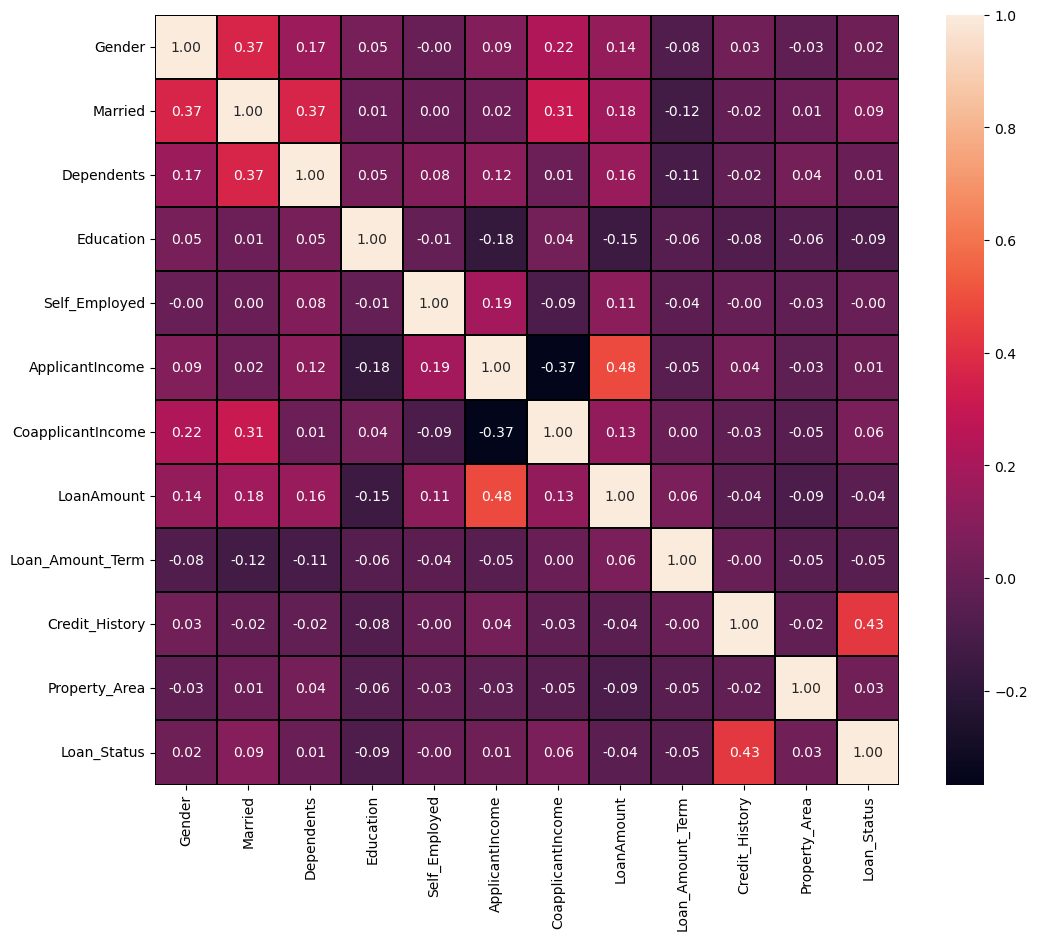

In [72]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='.2f')

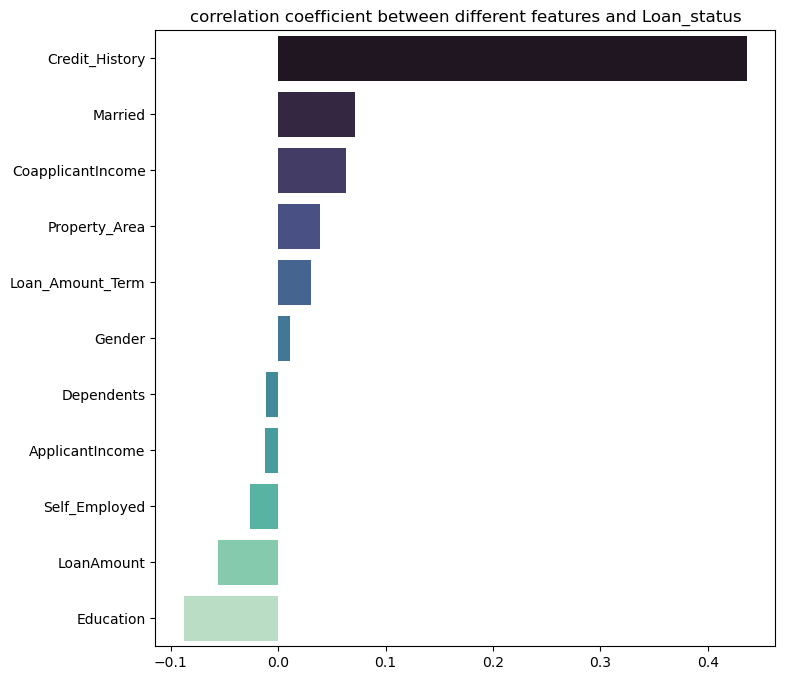

In [78]:
plt.figure(figsize=(8,8))
data=df_new.corr()['Loan_Status'].sort_values(ascending=False)
indices=data.index
labels=[]
corr=[]
for i in range(1,len(indices)):
    labels.append(indices[i])
    corr.append(data[i])
sns.barplot(x=corr,y=labels,palette='mako')
plt.title('correlation coefficient between different features and Loan_status')

plt.show()

Our target feature 'Loan_Status' have positive correlation with credit_history,and negative correlation with Education.

#splitting the data

In [95]:
x=df_new.drop(columns=['Loan_Status'])
y=df_new['Loan_Status']

In [96]:
x.shape,y.shape

((581, 11), (581,))

# Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

In [98]:
st=StandardScaler()
X=st.fit_transform(x)
X=pd.DataFrame(X,columns=x.columns)

# Varience Inflation Factor

Varience_inflation_factor is used to check for multicollinearity

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif["Features List"]=X.columns
vif["VIF Value"]=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif

,Features List,VIF Value
0,Gender,1.222040
1,Married,1.412707
2,Dependents,1.207681
3,Education,1.079332
4,Self_Employed,1.054271
5,ApplicantIncome,2.016583
6,CoapplicantIncome,1.632793
7,LoanAmount,1.739960
8,Loan_Amount_Term,1.057800
9,Credit_History,1.018256


# Model Building

#importing libraries
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score


In [106]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=30)

In [107]:
model=[LogisticRegression(),SVC(),KNeighborsClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),AdaBoostClassifier(),ExtraTreesClassifier(),GaussianNB(),DecisionTreeClassifier()]

# Finding Best Random State

In [108]:
maxAccu=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxrs=i
print('Best accuracy is', maxAccu ,'on Random_state', maxrs)
    

Best accuracy is 0.8632478632478633 on Random_state 142


In [109]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=142)

In [110]:
print(x_train.shape,y_train.shape)

(464, 11) (464,)


In [111]:
print(x_test.shape,y_test.shape)

(117, 11) (117,)


In [115]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print('Evaluation Metrics of ',m,'is :')
    print('\n')
    print('Accuracy score :\n',accuracy_score(y_test,pred))
    print('\n')
    print('Confusion matrix :\n',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report :\n',classification_report(y_test, y_pred))
    print('='*100)
    

Evaluation Metrics of  LogisticRegression() is :


Accuracy score :
 0.8632478632478633


Confusion matrix :
 [[20 12]
 [ 4 81]]


Classification Report :
               precision    recall  f1-score   support

           0       0.21      0.22      0.22        32
           1       0.70      0.69      0.70        85

    accuracy                           0.56       117
   macro avg       0.46      0.46      0.46       117
weighted avg       0.57      0.56      0.57       117

Evaluation Metrics of  SVC() is :


Accuracy score :
 0.8461538461538461


Confusion matrix :
 [[17 15]
 [ 3 82]]


Classification Report :
               precision    recall  f1-score   support

           0       0.21      0.22      0.22        32
           1       0.70      0.69      0.70        85

    accuracy                           0.56       117
   macro avg       0.46      0.46      0.46       117
weighted avg       0.57      0.56      0.57       117

Evaluation Metrics of  KNeighborsClassifier() is 

Here LogisticRegression is giving the best accuracy score that is 0.8632

# Cross Validation Score

In [116]:
for m in model:
    score=cross_val_score(m,X,y,cv=5)
    print('\n')
    print('Cross Validation Score of ',m,':')
    print('Score :',score)
    print('Mean Score :',score.mean())
    print('Standard deviation :',score.std())
    print('='*100)



Cross Validation Score of  LogisticRegression() :
Score : [0.79487179 0.75862069 0.72413793 0.79310345 0.80172414]
Mean Score : 0.7744916003536693
Standard deviation : 0.029294170528908047


Cross Validation Score of  SVC() :
Score : [0.79487179 0.73275862 0.72413793 0.77586207 0.78448276]
Mean Score : 0.7624226348364279
Standard deviation : 0.02851626805383391


Cross Validation Score of  KNeighborsClassifier() :
Score : [0.74358974 0.70689655 0.72413793 0.75862069 0.73275862]
Mean Score : 0.7332007073386383
Standard deviation : 0.017483395166476737


Cross Validation Score of  GradientBoostingClassifier() :
Score : [0.74358974 0.70689655 0.70689655 0.74137931 0.75      ]
Mean Score : 0.7297524314765693
Standard deviation : 0.018875391536923317


Cross Validation Score of  RandomForestClassifier() :
Score : [0.77777778 0.68965517 0.72413793 0.76724138 0.75      ]
Mean Score : 0.7417624521072796
Standard deviation : 0.03174879194538492


Cross Validation Score of  AdaBoostClassifier(

# Hyper Parameter Tuning

In [117]:
param = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

In [118]:
grid=GridSearchCV(estimator=LogisticRegression(),param_grid=param,cv=5)
grid.fit(X,y)
print(grid)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']})


In [119]:
print(grid.best_score_)
print(grid.best_params_)

0.7744916003536693
{'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [127]:
final_model=LogisticRegression(C=1,class_weight=None, max_iter=100, solver='liblinear')

In [128]:
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print('Accuracy score :\n',accuracy_score(y_test,pred))
print('\n')
print('Confusion matrix :\n',confusion_matrix(y_test,pred))
print('\n')
print('Classification Report :\n',classification_report(y_test, y_pred))
    
    

Accuracy score :
 0.8632478632478633


Confusion matrix :
 [[20 12]
 [ 4 81]]


Classification Report :
               precision    recall  f1-score   support

           0       0.21      0.22      0.22        32
           1       0.70      0.69      0.70        85

    accuracy                           0.56       117
   macro avg       0.46      0.46      0.46       117
weighted avg       0.57      0.56      0.57       117



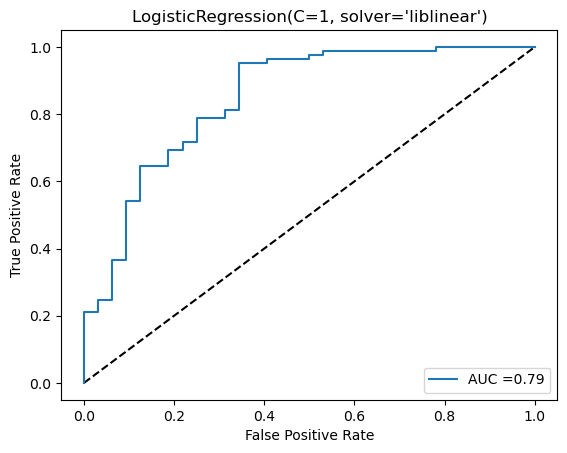

In [131]:
y_pred_prob = final_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
auc_score = roc_auc_score(y_test, final_model.predict(x_test))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label = 'AUC ='+str(round(auc_score,2)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.title(final_model)
plt.show()

# Saving the model

In [132]:
import joblib

In [133]:
joblib.dump(final_model,'Loan Application Status Prediction.obj')

['Loan Application Status Prediction.obj']

# Final Prediction

In [136]:
prediction=final_model.predict(x_test)
actual=np.array(y_test)
df_pred=pd.DataFrame()
df_pred['Predicted Values']=prediction
df_pred['Actual Values']=actual
df_pred

,Predicted Values,Actual Values
0,1,1
1,0,0
2,1,0
3,1,1
4,1,1
...,...,...
112,1,1
113,1,1
114,1,1
115,1,0


In [151]:
prediction=final_model.predict(x_test)
actual=np.array(y_test)
df_pred=pd.DataFrame()
df_pred['Predicted status']=prediction
df_pred['Actual status']=actual
df_pred

,Predicted status,Actual status
0,1,1
1,0,0
2,1,0
3,1,1
4,1,1
...,...,...
112,1,1
113,1,1
114,1,1
115,1,0


In [152]:
df_pred['Predicted status'] = df_pred['Predicted status'].replace({0: 'No', 1: 'Yes'})
df_pred['Actual status'] = df_pred['Actual status'].replace({0: 'No', 1: 'Yes'})


In [153]:
df_pred

,Predicted status,Actual status
0,Yes,Yes
1,No,No
2,Yes,No
3,Yes,Yes
4,Yes,Yes
...,...,...
112,Yes,Yes
113,Yes,Yes
114,Yes,Yes
115,Yes,No


# _________________________Thank You _________________________